In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import keras
import pandas as pd
import numpy as np
from keras.models import Model, Sequential,load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications import Xception
from keras.applications import DenseNet121, DenseNet169, DenseNet201
from keras.optimizers import Adam, RMSprop,SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from PIL import Image
import cv2
import os
import glob
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
directory = "/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/dataset"
folders = os.listdir(directory)
print(folders)

image_names = []
size = (224,224)



['benign nevi', 'acral melanoma']


In [ ]:
dataset_labels = []
dataset = []
for folder in folders:
    for file in os.listdir(os.path.join(directory,folder)):
          image_names.append(os.path.join(directory,folder,file))
          dataset_labels.append(folder)
          img = cv2.imread(os.path.join(directory,folder,file))
          # resize image
          img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
          im = cv2.resize(img,size,interpolation = cv2.INTER_CUBIC)
          dataset.append(im)
      

In [ ]:
label_dummies = pd.get_dummies(dataset_labels)
labels =  label_dummies.values.argmax(1)
print(pd.unique(dataset_labels))
print(pd.unique(labels))


# Convert the shuffled list to numpy array type

dataset = np.array(dataset)
labels = np.array(labels)

print ("total dataset shape",dataset.shape)
print ("total Labels shape",labels.shape)


['benign nevi' 'acral melanoma']
[1 0]
total dataset shape (724, 224, 224, 3)
total Labels shape (724,)


In [ ]:
print(dataset.shape)
print(labels.shape)

(724, 224, 224, 3)
(724,)


In [ ]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# normalize dataset
dataset = dataset.astype('float32') 
dataset /= 255

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(dataset,labels,test_size=0.2,random_state = 3, shuffle=True)

print("x train=",X_train.shape)
print("y train=",Y_train.shape)

print("x test=",X_test.shape)
print("y test=",Y_test.shape)



x train= (579, 224, 224, 3)
y train= (579,)
x test= (145, 224, 224, 3)
y test= (145,)


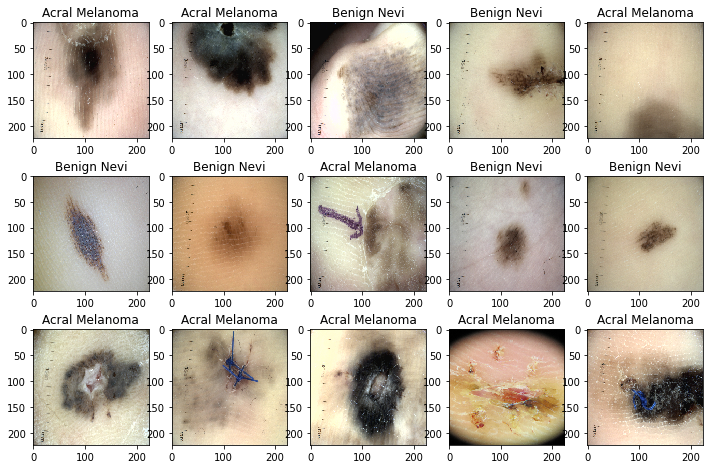

In [ ]:
# Display first 15 instances and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if Y_train[i] == 0:
        ax.title.set_text('Acral Melanoma')
    else:
        ax.title.set_text('Benign Nevi')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        fill_mode = 'nearest')  

datagen.fit(X_train)

# Fine Tune Pretrained VGG Network

In [ ]:
np.random.seed(42)


In [ ]:
base_model = VGG16( weights='imagenet',
    include_top=False, 
    input_shape=(224,224,3))

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_3
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [ ]:
NUM_CLASSES = 2

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
#model.add(layers.Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))




In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 25,693,186
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
19/19 [==============================] - 7s 361ms/step - loss: 0.4768 - accuracy: 0.7807 - val_loss: 0.4607 - val_accuracy: 0.8069
Epoch 2/10
19/19 [==============================] - 7s 354ms/step - loss: 0.3684 - accuracy: 0.8428 - val_loss: 0.4057 - val_accuracy: 0.8207
Epoch 3/10
19/19 [==============================] - 7s 354ms/step - loss: 0.3225 - accuracy: 0.8618 - val_loss: 0.3419 - val_accuracy: 0.8552
Epoch 4/10
19/19 [==============================] - 7s 363ms/step - loss: 0.3431 - accuracy: 0.8480 - val_loss: 0.4090 - val_accuracy: 0.8069
Epoch 5/10
19/19 [==============================] - 7s 356ms/step - loss: 0.3111 - accuracy: 0.8532 - val_loss: 0.3426 - val_accuracy: 0.8690
Epoch 6/10
19/19 [==============================] - 7s 358ms/step - loss: 0.2957 - accuracy: 0.8705 - val_loss: 0.4422 - val_accuracy: 0.8069
Epoch 7/10
19/19 [==============================] - 7s 356ms/step - loss: 0.2805 - accuracy: 0.8860 - val_loss: 0.3148 - val_accuracy: 0.8621
Epoch 

In [ ]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
18/18 [==============================] - 7s 416ms/step - loss: 0.8454 - accuracy: 0.6545 - val_loss: 0.5129 - val_accuracy: 0.7724
Epoch 2/10
18/18 [==============================] - 6s 348ms/step - loss: 0.4056 - accuracy: 0.8190 - val_loss: 0.6376 - val_accuracy: 0.6759
Epoch 3/10
18/18 [==============================] - 6s 348ms/step - loss: 0.3548 - accuracy: 0.8391 - val_loss: 0.4673 - val_accuracy: 0.8000
Epoch 4/10
18/18 [==============================] - 6s 350ms/step - loss: 0.3230 - accuracy: 0.8684 - val_loss: 0.3988 - val_accuracy: 0.8414
Epoch 5/10
18/18 [==============================] - 6s 348ms/step - loss: 0.3146 - accuracy: 0.8629 - val_loss: 0.3544 - val_accuracy: 0.8483
Epoch 6/10
18/18 [==============================] - 6s 356ms/step - loss: 0.3051 - accuracy: 0.8611 - val_loss: 0.3469 - val_accuracy: 0.8483
Epoch 7/10
18/18 [==============================] - 6s 354ms/step - loss

In [ ]:
for layer in base_model.layers[:11]:
    layer.trainable = False
for layer in base_model.layers[11:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 2

model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.5))
model2.add(Dense(NUM_CLASSES, activation='softmax'))


In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 38,672,386
Non-trainable params: 1,735,488
_________________________________________________________________


In [ ]:
epochs = 50
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
19/19 [==============================] - 8s 393ms/step - loss: 0.7617 - accuracy: 0.6909 - val_loss: 0.4766 - val_accuracy: 0.8138
Epoch 2/50
19/19 [==============================] - 8s 391ms/step - loss: 0.4209 - accuracy: 0.8080 - val_loss: 0.4745 - val_accuracy: 0.7862
Epoch 3/50
19/19 [==============================] - 7s 389ms/step - loss: 0.3668 - accuracy: 0.8434 - val_loss: 0.4442 - val_accuracy: 0.8276
Epoch 4/50
19/19 [==============================] - 8s 392ms/step - loss: 0.3870 - accuracy: 0.8473 - val_loss: 0.6550 - val_accuracy: 0.7448
Epoch 5/50
19/19 [==============================] - 7s 409ms/step - loss: 0.3943 - accuracy: 0.8374 - val_loss: 0.4955 - val_accuracy: 0.8276
Epoch 6/50
19/19 [==============================] - 7s 390ms/step - loss: 0.2972 - accuracy: 0.8946 - val_loss: 0.3702 - val_accuracy: 0.8552
Epoch 7/50
19/19 [==============================] - 7s 390ms/step - loss: 0.3335 - accuracy: 0.8462 - val_loss: 0.4625 - val_accuracy: 0.7862
Epoch 

In [ ]:
epochs = 50
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
18/18 [==============================] - 7s 376ms/step - loss: 0.4951 - accuracy: 0.7623 - val_loss: 0.5832 - val_accuracy: 0.7448
Epoch 2/50
18/18 [==============================] - 7s 364ms/step - loss: 0.3938 - accuracy: 0.8446 - val_loss: 0.3895 - val_accuracy: 0.8276
Epoch 3/50
18/18 [==============================] - 6s 360ms/step - loss: 0.4054 - accuracy: 0.8190 - val_loss: 0.3617 - val_accuracy: 0.8828
Epoch 4/50
18/18 [==============================] - 7s 361ms/step - loss: 0.3131 - accuracy: 0.8611 - val_loss: 0.3275 - val_accuracy: 0.8759
Epoch 5/50
18/18 [==============================] - 7s 365ms/step - loss: 0.2589 - accuracy: 0.8885 - val_loss: 0.2926 - val_accuracy: 0.8897
Epoch 6/50
18/18 [==============================] - 7s 366ms/step - loss: 0.2732 - accuracy: 0.8867 - val_loss: 0.3167 - val_accuracy: 0.8759
Epoch 7/50
18/18 [==============================] - 7s 367ms/step - loss: 0.2846 - accuracy: 0.8592 - val_loss: 0.2885 - val_accuracy: 0.8897
Epoch 

In [ ]:
# for sigmoid
predictions = (model2.predict(X_test) > 0.5).astype("int32")
y_pred = predictions.flatten()
print(y_pred)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)


In [ ]:
# for softmax
pred=model2.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  93.1034505367279


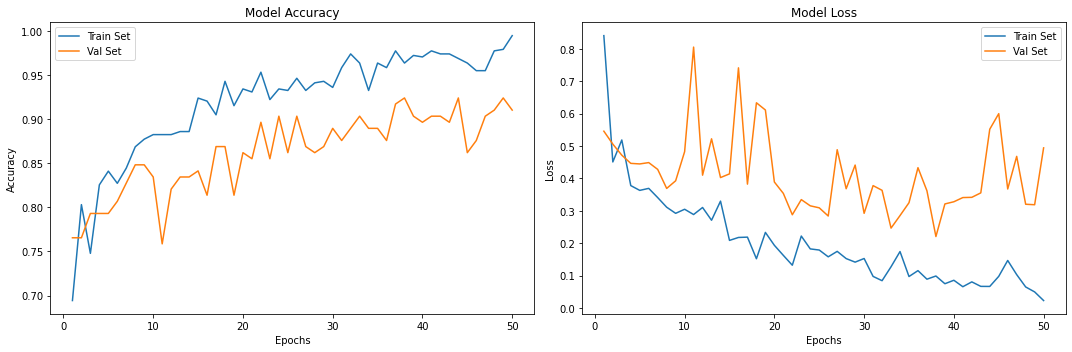

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

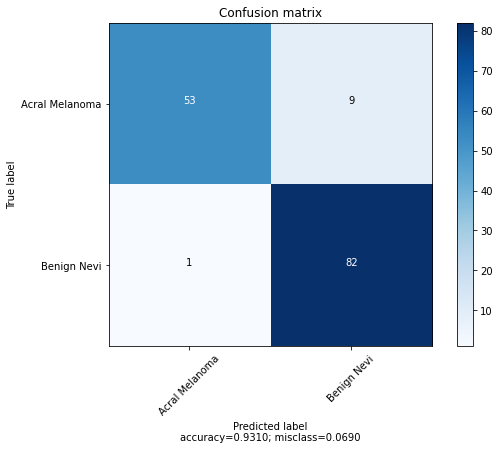

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:
model2.save('/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model7_vgg.h5')
#model_json = model2.to_json()
#with open ("/content/drive/My Drive/Binary Class Skin Disease Classification/Saved Models/skin disease classification_vgg.json","w") as json_file:
 #   json_file.write(model_json)

# Fine Tune Pretrained Inception-V3 Network

In [ ]:
inception_model = InceptionV3(
    weights='imagenet',
    include_top=False, 
    input_shape=(224,224,3)
)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
for i, layer in enumerate(inception_model.layers):
    print(i, layer.name)

0 input_2
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [ ]:
NUM_CLASSES = 2

model = Sequential()
model.add(inception_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
#model.add(layers.Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))


In [ ]:
for layer in inception_model.layers:
    layer.trainable = False

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1026      
Total params: 24,689,442
Trainable params: 2,886,658
Non-trainable params: 21,802,784
__________________________________

In [ ]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
18/18 [==============================] - 8s 417ms/step - loss: 0.5414 - accuracy: 0.7185 - val_loss: 0.5679 - val_accuracy: 0.7103
Epoch 2/10
18/18 [==============================] - 6s 326ms/step - loss: 0.3606 - accuracy: 0.8519 - val_loss: 0.4250 - val_accuracy: 0.8276
Epoch 3/10
18/18 [==============================] - 6s 324ms/step - loss: 0.3143 - accuracy: 0.8629 - val_loss: 0.4099 - val_accuracy: 0.8345
Epoch 4/10
18/18 [==============================] - 6s 327ms/step - loss: 0.3050 - accuracy: 0.8720 - val_loss: 0.4117 - val_accuracy: 0.8414
Epoch 5/10
18/18 [==============================] - 6s 325ms/step - loss: 0.2511 - accuracy: 0.9122 - val_loss: 0.4031 - val_accuracy: 0.8483
Epoch 6/10
18/18 [==============================] - 6s 327ms/step - loss: 0.2210 - accuracy: 0.9068 - val_loss: 0.3932 - val_accuracy: 0.8552
Epoch 7/10
18/18 [==============================] - 6s 327ms/step - loss: 0.2151 - accuracy: 0.9141 - val_loss: 0.4002 - val_accuracy: 0.8345
Epoch 

In [ ]:
for layer in inception_model.layers[:165]:
    layer.trainable = False
for layer in inception_model.layers[165:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 3

model2 = Sequential()
model2.add(inception_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
#model2.add(layers.Dropout(0.5))
model2.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 1539      
Total params: 24,689,955
Trainable params: 19,528,387
Non-trainable params: 5,161,568
__________________________________

In [ ]:
epochs = 50
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
18/18 [==============================] - 8s 418ms/step - loss: 0.6134 - accuracy: 0.7221 - val_loss: 0.4246 - val_accuracy: 0.8138
Epoch 2/50
18/18 [==============================] - 6s 355ms/step - loss: 0.2894 - accuracy: 0.8537 - val_loss: 0.4181 - val_accuracy: 0.8690
Epoch 3/50
18/18 [==============================] - 6s 356ms/step - loss: 0.2154 - accuracy: 0.9177 - val_loss: 0.4990 - val_accuracy: 0.8690
Epoch 4/50
18/18 [==============================] - 6s 354ms/step - loss: 0.1489 - accuracy: 0.9415 - val_loss: 0.3870 - val_accuracy: 0.8966
Epoch 5/50
18/18 [==============================] - 6s 351ms/step - loss: 0.1157 - accuracy: 0.9598 - val_loss: 0.2828 - val_accuracy: 0.9241
Epoch 6/50
18/18 [==============================] - 6s 357ms/step - loss: 0.0881 - accuracy: 0.9598 - val_loss: 0.2387 - val_accuracy: 0.9379
Epoch 7/50
18/18 [==============================] - 6s 358ms/step - loss: 0.0927 - accuracy: 0.9653 - val_loss: 0.2398 - val_accuracy: 0.9379
Epoch 

In [ ]:
pred=model2.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  93.1034505367279


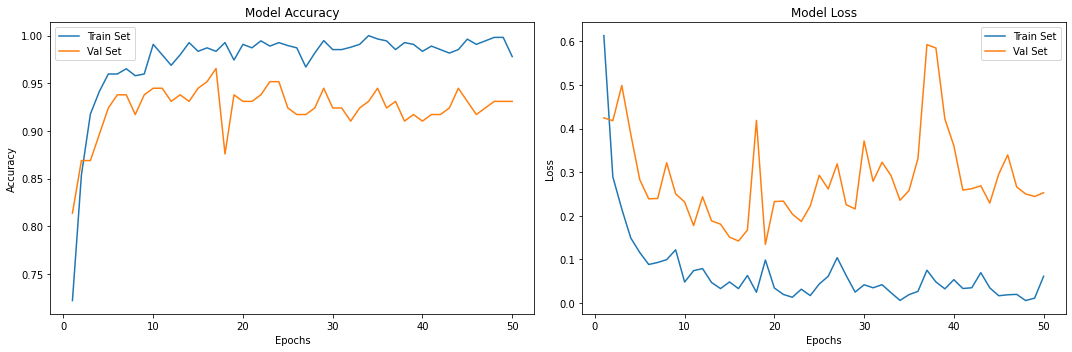

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

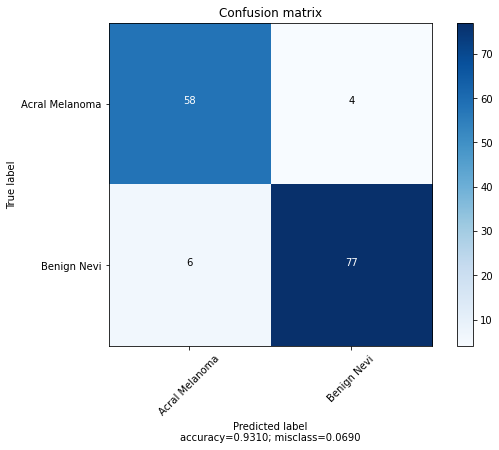

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:
model2.save('/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model2_inceptionV3.h5')
#model_json = model2.to_json()
#with open ("skin disease classification_inceptionV3","w") as json_file:
 #   json_file.write(model_json)

## Experiment 2

In [ ]:
inception_model2 = InceptionV3(
    weights='imagenet',
    include_top=False, 
    input_shape=(224,224,3)
)

In [ ]:
NUM_CLASSES = 2

model3 = Sequential()
model3.add(inception_model2)
model3.add(Dropout(0.5))
model3.add(GlobalAveragePooling2D())
model3.add(Dense(1024, activation = 'relu'))
model3.add(Dense(512,activation = 'relu'))
model3.add(Dense(256,activation = 'relu'))
model3.add(Dense(128,activation = 'relu'))

model3.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
for layer in inception_model2.layers:
    layer.trainable = False


In [ ]:
model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 2048)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

In [ ]:
epochs = 20
batch_size = 32
history = model3.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/20
18/18 [==============================] - 7s 402ms/step - loss: 0.4925 - accuracy: 0.7642 - val_loss: 0.5404 - val_accuracy: 0.7517
Epoch 2/20
18/18 [==============================] - 6s 331ms/step - loss: 0.3510 - accuracy: 0.8592 - val_loss: 0.4219 - val_accuracy: 0.8069
Epoch 3/20
18/18 [==============================] - 6s 347ms/step - loss: 0.2989 - accuracy: 0.8819 - val_loss: 0.4215 - val_accuracy: 0.7931
Epoch 4/20
18/18 [==============================] - 6s 331ms/step - loss: 0.2921 - accuracy: 0.8793 - val_loss: 0.3895 - val_accuracy: 0.8414
Epoch 5/20
18/18 [==============================] - 6s 333ms/step - loss: 0.2290 - accuracy: 0.9086 - val_loss: 0.3658 - val_accuracy: 0.8483
Epoch 6/20
18/18 [==============================] - 6s 351ms/step - loss: 0.2870 - accuracy: 0.8767 - val_loss: 0.4393 - val_accuracy: 0.8207
Epoch 7/20
18/18 [==============================] - 6s 334ms/step - loss: 0.2188 - accuracy: 0.9232 - val_loss: 0.4587 - val_accuracy: 0.8483
Epoch 

In [ ]:
for layer in inception_model2.layers[:133]:
    layer.trainable = False
for layer in inception_model2.layers[133:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 2

model4 = Sequential()
model4.add(inception_model2)
model4.add(GlobalAveragePooling2D())
model4.add(Dense(1024, activation = 'relu'))
model4.add(Dense(512,activation = 'relu'))
model4.add(Dense(256,activation = 'relu'))
model4.add(Dense(128,activation = 'relu'))
model4.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model4.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 2)                

In [ ]:
epochs = 50
batch_size = 32
history = model4.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
18/18 [==============================] - 8s 417ms/step - loss: 0.5425 - accuracy: 0.6801 - val_loss: 0.4483 - val_accuracy: 0.8207
Epoch 2/50
18/18 [==============================] - 6s 356ms/step - loss: 0.2976 - accuracy: 0.8757 - val_loss: 0.4433 - val_accuracy: 0.8828
Epoch 3/50
18/18 [==============================] - 6s 357ms/step - loss: 0.2198 - accuracy: 0.9214 - val_loss: 0.3605 - val_accuracy: 0.8690
Epoch 4/50
18/18 [==============================] - 6s 360ms/step - loss: 0.1230 - accuracy: 0.9543 - val_loss: 0.3476 - val_accuracy: 0.9172
Epoch 5/50
18/18 [==============================] - 6s 357ms/step - loss: 0.1085 - accuracy: 0.9580 - val_loss: 0.2912 - val_accuracy: 0.9103
Epoch 6/50
18/18 [==============================] - 6s 356ms/step - loss: 0.1021 - accuracy: 0.9580 - val_loss: 0.2569 - val_accuracy: 0.9172
Epoch 7/50
18/18 [==============================] - 6s 357ms/step - loss: 0.0506 - accuracy: 0.9872 - val_loss: 0.3343 - val_accuracy: 0.9103
Epoch 

In [ ]:
pred=model4.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model4.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  91.72413945198059


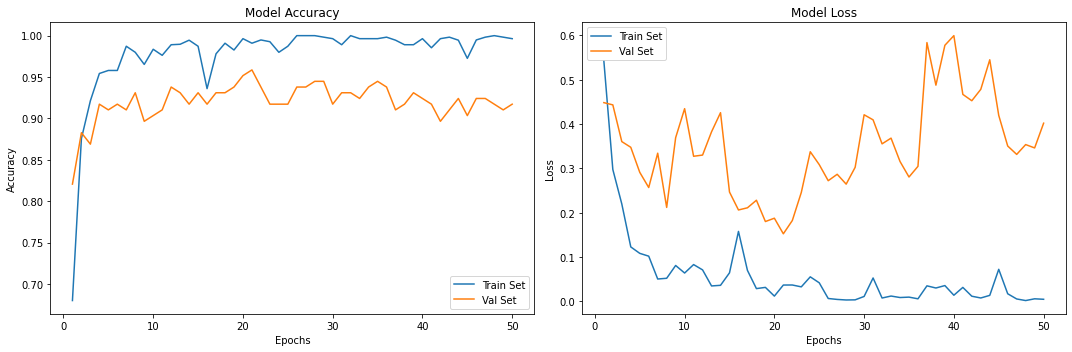

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)
plt.title('Model Loss')

plt.tight_layout()
plt.show()

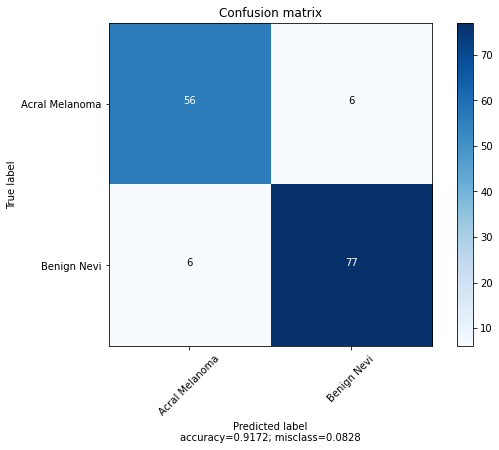

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:
model2.save('/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model3_inceptionV3.h5')
#model_json = model2.to_json()
#with open ("skin disease classification_inceptionV3","w") as json_file:
 #   json_file.write(model_json)

# Fine Tune Pretrained Xception Network

In [ ]:
base_model = Xception(weights = 'imagenet', include_top = False, input_shape=(224,224,3))

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

In [ ]:
NUM_CLASSES = 2

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2

In [ ]:
epochs = 20
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
18/18 [==============================] - 17s 449ms/step - loss: 0.6123 - accuracy: 0.6415 - val_loss: 0.4195 - val_accuracy: 0.8138
Epoch 2/20
18/18 [==============================] - 7s 372ms/step - loss: 0.3452 - accuracy: 0.8611 - val_loss: 0.3830 - val_accuracy: 0.8483
Epoch 3/20
18/18 [==============================] - 7s 373ms/step - loss: 0.3065 - accuracy: 0.8616 - val_loss: 0.3480 - val_accuracy: 0.8414
Epoch 4/20
18/18 [==============================] - 7s 371ms/step - loss: 0.2705 - accuracy: 0.8931 - val_loss: 0.3491 - val_accuracy: 0.8690
Epoch 5/20
18/18 [==============================] - 7s 372ms/step - loss: 0.2664 - accuracy: 0.8993 - val_loss: 0.3749 - val_accuracy: 0.8276
Epoch 6/20
18/18 [==============================] - 7s 377ms/step - loss: 0.2714 - accuracy: 0.8957 - val_loss: 0.3042 - val_accuracy: 0.8828
Epoch 7/20
18/18 [==============================] - 7s 393ms/step - loss: 0.2250 - accuracy: 0.9191 - val_loss: 0.3233 - val_accuracy: 0.8621
Epoch

In [ ]:
for layer in base_model.layers[:86]:
    layer.trainable = False
for layer in base_model.layers[86:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 2

model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dense(128,activation = 'relu'))
model2.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [ ]:
epochs = 25
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
18/18 [==============================] - 11s 464ms/step - loss: 0.6274 - accuracy: 0.5848 - val_loss: 0.4787 - val_accuracy: 0.7655
Epoch 2/25
18/18 [==============================] - 8s 424ms/step - loss: 0.3718 - accuracy: 0.8750 - val_loss: 0.6452 - val_accuracy: 0.8207
Epoch 3/25
18/18 [==============================] - 8s 422ms/step - loss: 0.2460 - accuracy: 0.9224 - val_loss: 0.6479 - val_accuracy: 0.8414
Epoch 4/25
18/18 [==============================] - 8s 425ms/step - loss: 0.1891 - accuracy: 0.9112 - val_loss: 0.7313 - val_accuracy: 0.8276
Epoch 5/25
18/18 [==============================] - 8s 430ms/step - loss: 0.1445 - accuracy: 0.9485 - val_loss: 0.6267 - val_accuracy: 0.8552
Epoch 6/25
18/18 [==============================] - 8s 428ms/step - loss: 0.1299 - accuracy: 0.9592 - val_loss: 0.4540 - val_accuracy: 0.8759
Epoch 7/25
18/18 [==============================] - 8s 428ms/step - loss: 0.0928 - accuracy: 0.9666 - val_loss: 0.3874 - val_accuracy: 0.8966
Epoch

In [ ]:
epochs = 10
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 8s 433ms/step - loss: 0.0969 - accuracy: 0.9653 - val_loss: 0.2620 - val_accuracy: 0.9241
Epoch 2/10
18/18 [==============================] - 8s 430ms/step - loss: 0.0474 - accuracy: 0.9835 - val_loss: 0.2522 - val_accuracy: 0.9103
Epoch 3/10
18/18 [==============================] - 8s 433ms/step - loss: 0.0365 - accuracy: 0.9909 - val_loss: 0.2426 - val_accuracy: 0.9103
Epoch 4/10
18/18 [==============================] - 8s 434ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2247 - val_accuracy: 0.9103
Epoch 5/10
18/18 [==============================] - 8s 433ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2213 - val_accuracy: 0.9172
Epoch 6/10
18/18 [==============================] - 8s 431ms/step - loss: 0.0183 - accuracy: 0.9927 - val_loss: 0.2811 - val_accuracy: 0.9379
Epoch 7/10
18/18 [==============================] - 8s 422ms/step - loss: 0.0740 - accuracy: 0.9781 - val_loss: 0.2336 - val_accuracy: 0.9172
Epoch 

In [ ]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
18/18 [==============================] - 8s 421ms/step - loss: 0.0339 - accuracy: 0.9909 - val_loss: 0.4352 - val_accuracy: 0.8897
Epoch 2/10
18/18 [==============================] - 8s 423ms/step - loss: 0.0625 - accuracy: 0.9872 - val_loss: 0.2639 - val_accuracy: 0.9172
Epoch 3/10
18/18 [==============================] - 8s 442ms/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 0.2716 - val_accuracy: 0.9034
Epoch 4/10
18/18 [==============================] - 8s 440ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.8966
Epoch 5/10
18/18 [==============================] - 8s 439ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.2485 - val_accuracy: 0.9241
Epoch 6/10
18/18 [==============================] - 8s 441ms/step - loss: 0.0099 - accuracy: 0.9982 - val_loss: 0.3183 - val_accuracy: 0.9241
Epoch 7/10
18/18 [==============================] - 8s 437ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 0.3078 - val_accuracy: 0.9103
Epoch 

In [ ]:
epochs = 5
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/5
18/18 [==============================] - 8s 424ms/step - loss: 0.0072 - accuracy: 0.9945 - val_loss: 0.1883 - val_accuracy: 0.9448
Epoch 2/5
18/18 [==============================] - 8s 431ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.1979 - val_accuracy: 0.9379
Epoch 3/5
18/18 [==============================] - 8s 432ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.2301 - val_accuracy: 0.9310
Epoch 4/5
18/18 [==============================] - 8s 442ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.2209 - val_accuracy: 0.9172
Epoch 5/5
18/18 [==============================] - 8s 434ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.2300 - val_accuracy: 0.9310


In [ ]:
model2.save('/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model13_xception.h5')

In [ ]:
pred=model2.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  95.1724112033844


In [ ]:
model.save('skin disease classification_Xception.h5')
model_json = model.to_json()
with open ("skin disease classification_Xception.json","w") as json_file:
    json_file.write(model_json)

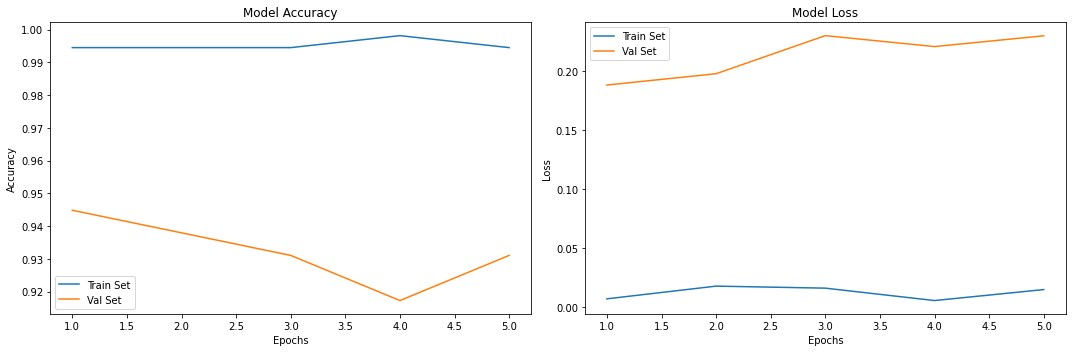

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

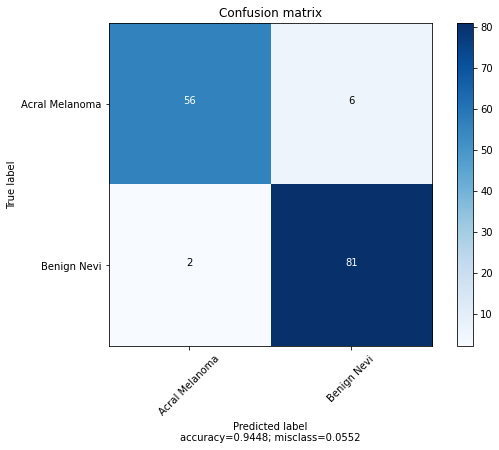

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi',]
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

# Fine Tune InceptionResnetV2 Network

In [ ]:
from keras.applications import InceptionResNetV2

In [ ]:
base_model2 = InceptionResNetV2( weights = 'imagenet',include_top = False, input_shape = (224,224,3))

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
base_model2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 111, 111, 32) 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_4[0][0]      
________________________________________________________________________________

In [ ]:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name)

0 input_2
1 conv2d_4
2 batch_normalization_4
3 activation
4 conv2d_5
5 batch_normalization_5
6 activation_1
7 conv2d_6
8 batch_normalization_6
9 activation_2
10 max_pooling2d
11 conv2d_7
12 batch_normalization_7
13 activation_3
14 conv2d_8
15 batch_normalization_8
16 activation_4
17 max_pooling2d_1
18 conv2d_12
19 batch_normalization_12
20 activation_8
21 conv2d_10
22 conv2d_13
23 batch_normalization_10
24 batch_normalization_13
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_9
29 conv2d_11
30 conv2d_14
31 conv2d_15
32 batch_normalization_9
33 batch_normalization_11
34 batch_normalization_14
35 batch_normalization_15
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed_5b
41 conv2d_19
42 batch_normalization_19
43 activation_15
44 conv2d_17
45 conv2d_20
46 batch_normalization_17
47 batch_normalization_20
48 activation_13
49 activation_16
50 conv2d_16
51 conv2d_18
52 conv2d_21
53 batch_normalization_16
54 batch_normalization_18
55 batch_normalization_

In [ ]:
NUM_CLASSES = 2

model2 = Sequential()
model2.add(base_model2)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dense(128,activation = 'relu'))
model2.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
for layer in base_model2.layers:
    layer.trainable = False


In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1536)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1573888   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                

In [ ]:
epochs = 20
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
18/18 [==============================] - 19s 582ms/step - loss: 0.5783 - accuracy: 0.6720 - val_loss: 0.3777 - val_accuracy: 0.8414
Epoch 2/20
18/18 [==============================] - 7s 394ms/step - loss: 0.3476 - accuracy: 0.8339 - val_loss: 0.3737 - val_accuracy: 0.8138
Epoch 3/20
18/18 [==============================] - 7s 386ms/step - loss: 0.2974 - accuracy: 0.8882 - val_loss: 0.4089 - val_accuracy: 0.8345
Epoch 4/20
18/18 [==============================] - 7s 391ms/step - loss: 0.2574 - accuracy: 0.8850 - val_loss: 0.2831 - val_accuracy: 0.8966
Epoch 5/20
18/18 [==============================] - 7s 392ms/step - loss: 0.1936 - accuracy: 0.9346 - val_loss: 0.3112 - val_accuracy: 0.8690
Epoch 6/20
18/18 [==============================] - 7s 396ms/step - loss: 0.1921 - accuracy: 0.9403 - val_loss: 0.2824 - val_accuracy: 0.8966
Epoch 7/20
18/18 [==============================] - 7s 411ms/step - loss: 0.1957 - accuracy: 0.9265 - val_loss: 0.3511 - val_accuracy: 0.8276
Epoch

In [ ]:
for layer in base_model2.layers[:287]:
    layer.trainable = False
for layer in base_model2.layers[287:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 2

model3 = Sequential()
model3.add(base_model2)
model3.add(GlobalAveragePooling2D())
model3.add(Dense(1024, activation = 'relu'))
model3.add(Dense(512,activation = 'relu'))
model3.add(Dense(256,activation = 'relu'))
model3.add(Dense(128,activation = 'relu'))
model3.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1536)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              1573888   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 2)                

In [ ]:
epochs = 25
batch_size = 32
history = model3.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
18/18 [==============================] - 25s 698ms/step - loss: 0.6226 - accuracy: 0.6580 - val_loss: 1.2846 - val_accuracy: 0.6966
Epoch 2/25
18/18 [==============================] - 9s 510ms/step - loss: 0.2215 - accuracy: 0.9178 - val_loss: 1.7613 - val_accuracy: 0.7724
Epoch 3/25
18/18 [==============================] - 9s 498ms/step - loss: 0.1321 - accuracy: 0.9490 - val_loss: 0.9383 - val_accuracy: 0.8414
Epoch 4/25
18/18 [==============================] - 9s 496ms/step - loss: 0.1087 - accuracy: 0.9606 - val_loss: 0.8457 - val_accuracy: 0.8828
Epoch 5/25
18/18 [==============================] - 9s 496ms/step - loss: 0.0504 - accuracy: 0.9866 - val_loss: 1.0165 - val_accuracy: 0.8690
Epoch 6/25
18/18 [==============================] - 9s 500ms/step - loss: 0.0522 - accuracy: 0.9816 - val_loss: 0.9517 - val_accuracy: 0.8759
Epoch 7/25
18/18 [==============================] - 9s 499ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.5800 - val_accuracy: 0.9103
Epoch

In [ ]:
epochs = 10
batch_size = 32
history = model3.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 9s 496ms/step - loss: 0.0345 - accuracy: 0.9927 - val_loss: 0.3788 - val_accuracy: 0.9103
Epoch 2/10
18/18 [==============================] - 9s 510ms/step - loss: 0.0393 - accuracy: 0.9931 - val_loss: 0.2702 - val_accuracy: 0.9241
Epoch 3/10
18/18 [==============================] - 9s 504ms/step - loss: 0.0194 - accuracy: 0.9963 - val_loss: 0.2359 - val_accuracy: 0.9379
Epoch 4/10
18/18 [==============================] - 9s 499ms/step - loss: 0.0378 - accuracy: 0.9890 - val_loss: 0.1249 - val_accuracy: 0.9448
Epoch 5/10
18/18 [==============================] - 9s 521ms/step - loss: 0.0471 - accuracy: 0.9890 - val_loss: 0.1495 - val_accuracy: 0.9586
Epoch 6/10
18/18 [==============================] - 9s 496ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.2674 - val_accuracy: 0.9379
Epoch 7/10
18/18 [==============================] - 9s 495ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3078 - val_accuracy: 0.9448
Epoch 

In [ ]:
epochs = 10
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
18/18 [==============================] - 9s 491ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.2325 - val_accuracy: 0.9172
Epoch 2/10
18/18 [==============================] - 9s 492ms/step - loss: 0.0277 - accuracy: 0.9945 - val_loss: 0.2698 - val_accuracy: 0.9103
Epoch 3/10
18/18 [==============================] - 9s 492ms/step - loss: 0.0264 - accuracy: 0.9872 - val_loss: 0.1908 - val_accuracy: 0.9517
Epoch 4/10
18/18 [==============================] - 9s 492ms/step - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.2417 - val_accuracy: 0.9448
Epoch 5/10
18/18 [==============================] - 9s 489ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.3531 - val_accuracy: 0.9379
Epoch 6/10
18/18 [==============================] - 9s 488ms/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 0.4269 - val_accuracy: 0.9310
Epoch 7/10
18/18 [==============================] - 9s 475ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.5233 - val_accuracy: 0.9310
Epoch 

In [ ]:
model2.save ("/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model6_inceptionResnetv2.h5")


In [ ]:
pred=model2.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  91.8181836605072


# Fine-tune DenseNet121

In [ ]:
densenet_model = DenseNet121(
    weights='imagenet',
    include_top=False, 
    input_shape=(224,224,3)
)

In [ ]:
for i, layer in enumerate(densenet_model.layers):
    print(i, layer.name)

0 input_5
1 zero_padding2d_2
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_3
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block

In [ ]:
NUM_CLASSES = 2

model = Sequential()
model.add(densenet_model)
#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
#model.add(layers.Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))


In [ ]:
for layer in densenet_model.layers:
    layer.trainable = False

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_23 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 514       
Total params: 8,743,746
Trainable params: 1,706,242
Non-trainable params: 7,037,504
____________________________________

In [ ]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 13s 432ms/step - loss: 0.5926 - accuracy: 0.6982 - val_loss: 0.4409 - val_accuracy: 0.8069
Epoch 2/10
18/18 [==============================] - 6s 339ms/step - loss: 0.3326 - accuracy: 0.8736 - val_loss: 0.4020 - val_accuracy: 0.8345
Epoch 3/10
18/18 [==============================] - 6s 337ms/step - loss: 0.2629 - accuracy: 0.9054 - val_loss: 0.3651 - val_accuracy: 0.8552
Epoch 4/10
18/18 [==============================] - 6s 338ms/step - loss: 0.2323 - accuracy: 0.8962 - val_loss: 0.3440 - val_accuracy: 0.8552
Epoch 5/10
18/18 [==============================] - 6s 341ms/step - loss: 0.2177 - accuracy: 0.9067 - val_loss: 0.3374 - val_accuracy: 0.8552
Epoch 6/10
18/18 [==============================] - 6s 340ms/step - loss: 0.2113 - accuracy: 0.9083 - val_loss: 0.3346 - val_accuracy: 0.8552
Epoch 7/10
18/18 [==============================] - 6s 341ms/step - loss: 0.1802 - accuracy: 0.9248 - val_loss: 0.3943 - val_accuracy: 0.8483
Epoch

In [ ]:
for layer in densenet_model.layers[:137]:
    layer.trainable = False
for layer in densenet_model.layers[137:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 2

model2 = Sequential()
model2.add(densenet_model)
model2.add(GlobalAveragePooling2D())
#model2.add(Flatten())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(256,activation = 'relu'))
#model2.add(layers.Dropout(0.5))
model2.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 514       
Total params: 8,743,746
Trainable params: 7,362,562
Non-trainable params: 1,381,184
___________________________________

In [ ]:
epochs = 25
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
18/18 [==============================] - 17s 471ms/step - loss: 0.4971 - accuracy: 0.7379 - val_loss: 0.4894 - val_accuracy: 0.7517
Epoch 2/25
18/18 [==============================] - 7s 376ms/step - loss: 0.1867 - accuracy: 0.9185 - val_loss: 0.5079 - val_accuracy: 0.7931
Epoch 3/25
18/18 [==============================] - 7s 373ms/step - loss: 0.1610 - accuracy: 0.9431 - val_loss: 0.4949 - val_accuracy: 0.8414
Epoch 4/25
18/18 [==============================] - 7s 378ms/step - loss: 0.1003 - accuracy: 0.9553 - val_loss: 0.5180 - val_accuracy: 0.8414
Epoch 5/25
18/18 [==============================] - 7s 380ms/step - loss: 0.0588 - accuracy: 0.9765 - val_loss: 0.5399 - val_accuracy: 0.8483
Epoch 6/25
18/18 [==============================] - 7s 379ms/step - loss: 0.0796 - accuracy: 0.9683 - val_loss: 0.3058 - val_accuracy: 0.8966
Epoch 7/25
18/18 [==============================] - 7s 383ms/step - loss: 0.1268 - accuracy: 0.9516 - val_loss: 0.4378 - val_accuracy: 0.8897
Epoch

In [ ]:
epochs = 25
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
18/18 [==============================] - 7s 388ms/step - loss: 0.0175 - accuracy: 0.9927 - val_loss: 0.3853 - val_accuracy: 0.9103
Epoch 2/25
18/18 [==============================] - 7s 403ms/step - loss: 0.0932 - accuracy: 0.9634 - val_loss: 0.4798 - val_accuracy: 0.9034
Epoch 3/25
18/18 [==============================] - 7s 397ms/step - loss: 0.0691 - accuracy: 0.9744 - val_loss: 0.3826 - val_accuracy: 0.9103
Epoch 4/25
18/18 [==============================] - 7s 390ms/step - loss: 0.0194 - accuracy: 0.9945 - val_loss: 0.2171 - val_accuracy: 0.9310
Epoch 5/25
18/18 [==============================] - 7s 386ms/step - loss: 0.0149 - accuracy: 0.9963 - val_loss: 0.2056 - val_accuracy: 0.9172
Epoch 6/25
18/18 [==============================] - 7s 404ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.2237 - val_accuracy: 0.9241
Epoch 7/25
18/18 [==============================] - 7s 385ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1827 - val_accuracy: 0.9241
Epoch 

In [ ]:
pred=model2.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  93.1034505367279


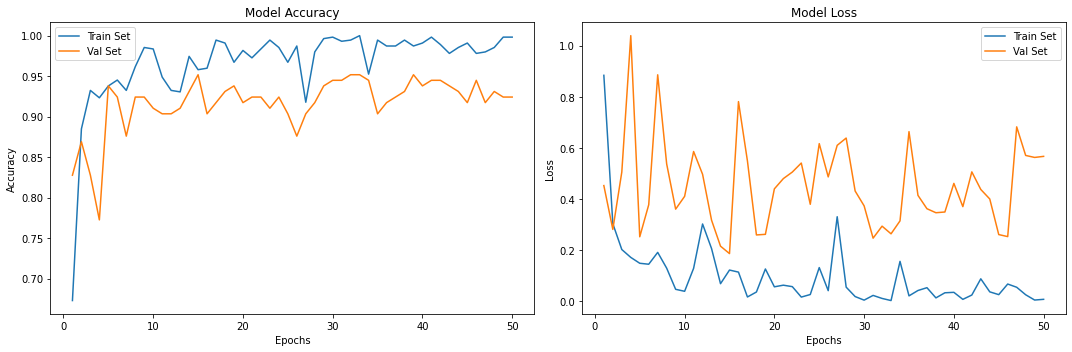

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

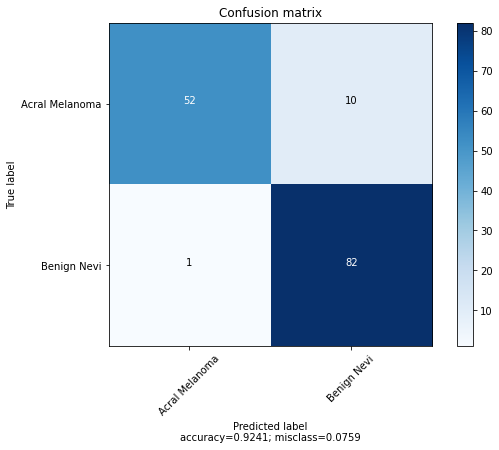

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:
model2.save('/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model6_densenet121.h5')
#model_json = model2.to_json()
#with open ("skin disease classification_inceptionV3","w") as json_file:
 #   json_file.write(model_json)

# DenseNet 169

In [ ]:
densenet_model2 = DenseNet169(
    weights='imagenet',
    include_top=False, 
    input_shape=(224,224,3)
)

In [ ]:
for i, layer in enumerate(densenet_model2.layers):
    print(i, layer.name)

0 input_7
1 zero_padding2d_6
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_7
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block

In [ ]:
NUM_CLASSES = 2

model = Sequential()
model.add(densenet_model2)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))


In [ ]:
for layer in densenet_model2.layers:
    layer.trainable = False

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1664)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              1704960   
_________________________________________________________________
dense_39 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 2)               

In [ ]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 17s 508ms/step - loss: 0.6306 - accuracy: 0.6608 - val_loss: 0.3909 - val_accuracy: 0.8207
Epoch 2/10
18/18 [==============================] - 7s 367ms/step - loss: 0.3537 - accuracy: 0.8754 - val_loss: 0.3370 - val_accuracy: 0.8345
Epoch 3/10
18/18 [==============================] - 7s 385ms/step - loss: 0.3098 - accuracy: 0.8577 - val_loss: 0.3275 - val_accuracy: 0.8483
Epoch 4/10
18/18 [==============================] - 7s 365ms/step - loss: 0.2411 - accuracy: 0.8977 - val_loss: 0.3347 - val_accuracy: 0.8483
Epoch 5/10
18/18 [==============================] - 7s 367ms/step - loss: 0.2363 - accuracy: 0.8985 - val_loss: 0.3383 - val_accuracy: 0.8828
Epoch 6/10
18/18 [==============================] - 7s 367ms/step - loss: 0.2350 - accuracy: 0.9116 - val_loss: 0.3301 - val_accuracy: 0.8690
Epoch 7/10
18/18 [==============================] - 7s 366ms/step - loss: 0.2126 - accuracy: 0.9074 - val_loss: 0.3753 - val_accuracy: 0.8690
Epoch

In [ ]:
for layer in densenet_model2.layers[:137]:
    layer.trainable = False
for layer in densenet_model2.layers[137:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 2

model2 = Sequential()
model2.add(densenet_model2)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1664)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              1704960   
_________________________________________________________________
dense_43 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 2)               

In [ ]:
epochs = 25
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
18/18 [==============================] - 23s 572ms/step - loss: 0.6374 - accuracy: 0.6295 - val_loss: 0.5065 - val_accuracy: 0.7517
Epoch 2/25
18/18 [==============================] - 8s 434ms/step - loss: 0.2599 - accuracy: 0.8987 - val_loss: 0.4711 - val_accuracy: 0.7793
Epoch 3/25
18/18 [==============================] - 8s 433ms/step - loss: 0.1691 - accuracy: 0.9383 - val_loss: 0.3429 - val_accuracy: 0.8759
Epoch 4/25
18/18 [==============================] - 8s 433ms/step - loss: 0.1129 - accuracy: 0.9586 - val_loss: 0.3359 - val_accuracy: 0.8897
Epoch 5/25
18/18 [==============================] - 8s 433ms/step - loss: 0.1080 - accuracy: 0.9547 - val_loss: 0.3513 - val_accuracy: 0.8966
Epoch 6/25
18/18 [==============================] - 8s 435ms/step - loss: 0.0653 - accuracy: 0.9799 - val_loss: 0.3093 - val_accuracy: 0.9034
Epoch 7/25
18/18 [==============================] - 8s 430ms/step - loss: 0.0443 - accuracy: 0.9931 - val_loss: 0.7111 - val_accuracy: 0.8207
Epoch

In [ ]:
epochs = 10
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 8s 439ms/step - loss: 0.0763 - accuracy: 0.9781 - val_loss: 0.5626 - val_accuracy: 0.8759
Epoch 2/10
18/18 [==============================] - 8s 417ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.4577 - val_accuracy: 0.8897
Epoch 3/10
18/18 [==============================] - 8s 413ms/step - loss: 0.0090 - accuracy: 0.9963 - val_loss: 0.3894 - val_accuracy: 0.9034
Epoch 4/10
18/18 [==============================] - 8s 418ms/step - loss: 0.0198 - accuracy: 0.9963 - val_loss: 0.3877 - val_accuracy: 0.8966
Epoch 5/10
18/18 [==============================] - 8s 417ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3774 - val_accuracy: 0.8966
Epoch 6/10
18/18 [==============================] - 8s 422ms/step - loss: 0.0059 - accuracy: 0.9963 - val_loss: 0.3879 - val_accuracy: 0.9034
Epoch 7/10
18/18 [==============================] - 8s 417ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.3404 - val_accuracy: 0.9034
Epoch 

In [ ]:
pred=model2.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  94.48275566101074


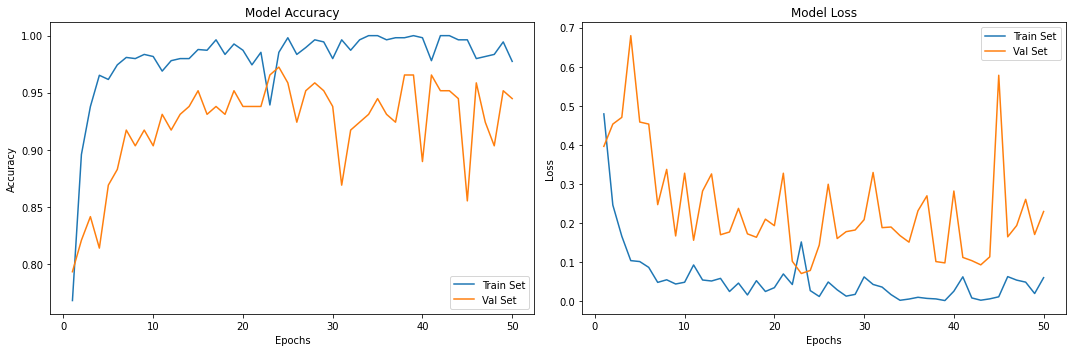

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

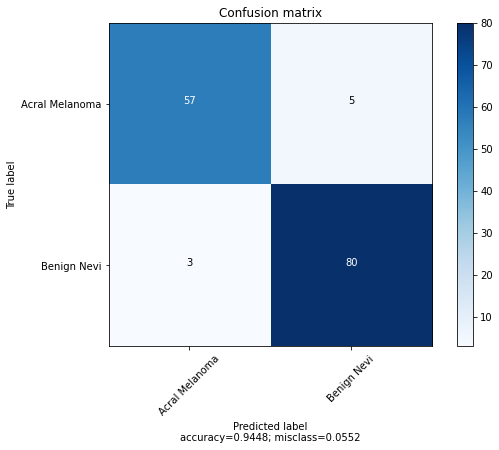

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:
model2.save('/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model8_densenet169.h5')
#model_json = model2.to_json()
#with open ("skin disease classification_inceptionV3","w") as json_file:
 #   json_file.write(model_json)

# DenseNet 201

In [ ]:
densenet_model3 = DenseNet201(
    weights='imagenet',
    include_top=False, 
    input_shape=(224,224,3)
)

In [ ]:
for i, layer in enumerate(densenet_model3.layers):
    print(i, layer.name)

0 input_9
1 zero_padding2d_10
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_11
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_blo

In [ ]:
NUM_CLASSES = 2

model = Sequential()
model.add(densenet_model3)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))


In [ ]:
for layer in densenet_model3.layers:
    layer.trainable = False

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_10  (None, 1920)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 1024)              1967104   
_________________________________________________________________
dense_55 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 2)               

In [ ]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 19s 572ms/step - loss: 0.6606 - accuracy: 0.5973 - val_loss: 0.4307 - val_accuracy: 0.8276
Epoch 2/10
18/18 [==============================] - 7s 381ms/step - loss: 0.4298 - accuracy: 0.7896 - val_loss: 0.3916 - val_accuracy: 0.8414
Epoch 3/10
18/18 [==============================] - 7s 382ms/step - loss: 0.2849 - accuracy: 0.8889 - val_loss: 0.3404 - val_accuracy: 0.8690
Epoch 4/10
18/18 [==============================] - 7s 385ms/step - loss: 0.3023 - accuracy: 0.8559 - val_loss: 0.3393 - val_accuracy: 0.8414
Epoch 5/10
18/18 [==============================] - 7s 384ms/step - loss: 0.1993 - accuracy: 0.9315 - val_loss: 0.3308 - val_accuracy: 0.8690
Epoch 6/10
18/18 [==============================] - 7s 386ms/step - loss: 0.1930 - accuracy: 0.9200 - val_loss: 0.3304 - val_accuracy: 0.8621
Epoch 7/10
18/18 [==============================] - 7s 395ms/step - loss: 0.1945 - accuracy: 0.9277 - val_loss: 0.3210 - val_accuracy: 0.8690
Epoch

In [ ]:
for layer in densenet_model3.layers[:137]:
    layer.trainable = False
for layer in densenet_model3.layers[137:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 2

model2 = Sequential()
model2.add(densenet_model3)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_11  (None, 1920)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              1967104   
_________________________________________________________________
dense_59 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_60 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 2)               

In [ ]:
epochs = 25
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
18/18 [==============================] - 28s 645ms/step - loss: 0.5326 - accuracy: 0.6863 - val_loss: 0.5811 - val_accuracy: 0.7310
Epoch 2/25
18/18 [==============================] - 9s 489ms/step - loss: 0.1944 - accuracy: 0.9211 - val_loss: 0.3407 - val_accuracy: 0.8690
Epoch 3/25
18/18 [==============================] - 9s 488ms/step - loss: 0.1273 - accuracy: 0.9589 - val_loss: 0.5123 - val_accuracy: 0.8138
Epoch 4/25
18/18 [==============================] - 9s 489ms/step - loss: 0.1457 - accuracy: 0.9497 - val_loss: 0.3005 - val_accuracy: 0.8897
Epoch 5/25
18/18 [==============================] - 9s 490ms/step - loss: 0.0852 - accuracy: 0.9878 - val_loss: 0.1870 - val_accuracy: 0.9172
Epoch 6/25
18/18 [==============================] - 9s 477ms/step - loss: 0.0507 - accuracy: 0.9900 - val_loss: 0.1895 - val_accuracy: 0.9172
Epoch 7/25
18/18 [==============================] - 9s 489ms/step - loss: 0.0601 - accuracy: 0.9884 - val_loss: 0.2678 - val_accuracy: 0.9172
Epoch

In [ ]:
epochs = 10
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 9s 481ms/step - loss: 0.0671 - accuracy: 0.9799 - val_loss: 0.2059 - val_accuracy: 0.9241
Epoch 2/10
18/18 [==============================] - 9s 495ms/step - loss: 0.0260 - accuracy: 0.9948 - val_loss: 0.1685 - val_accuracy: 0.9448
Epoch 3/10
18/18 [==============================] - 9s 480ms/step - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.1803 - val_accuracy: 0.9517
Epoch 4/10
18/18 [==============================] - 9s 483ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1695 - val_accuracy: 0.9310
Epoch 5/10
18/18 [==============================] - 9s 488ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1664 - val_accuracy: 0.9448
Epoch 6/10
18/18 [==============================] - 9s 488ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1589 - val_accuracy: 0.9517
Epoch 7/10
18/18 [==============================] - 9s 486ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.1677 - val_accuracy: 0.9517
Epoch 

In [ ]:
pred=model2.predict(X_test)
y_pred=np.argmax(pred,axis=1)

loss, acc = model2.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  95.86206674575806


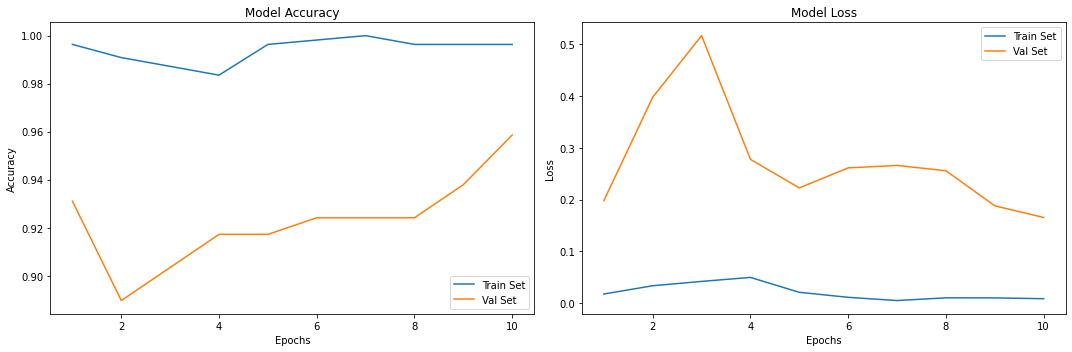

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

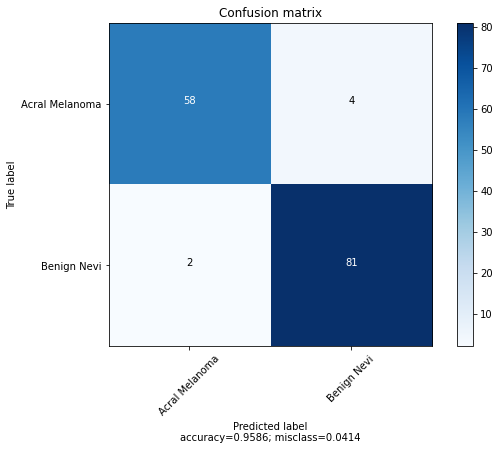

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:
model2.save('/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/trained model/model12_densenet201.h5')
#model_json = model2.to_json()
#with open ("skin disease classification_inceptionV3","w") as json_file:
 #   json_file.write(model_json)

# Creating an Ensemble 

In [ ]:
from keras.layers.merge import concatenate
from keras.models import load_model

In [ ]:
def plot (history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs_range = range(1, len(history.epoch) + 1)

  plt.figure(figsize=(15,5))

  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Train Set')
  plt.plot(epochs_range, val_acc, label='Val Set')
  plt.legend(loc="best")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Model Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Train Set')
  plt.plot(epochs_range, val_loss, label='Val Set')
  plt.legend(loc="best")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Model Loss')

  plt.tight_layout()
  plt.show()



In [ ]:
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = '/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/Models for ensemble/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models


In [ ]:
from keras.utils import plot_model

def define_stacked_model(members):
  for i in range(len(members)):
    model = members[i]
    for layer in model.layers:
      layer.trainable = False
      layer._name = 'ensembles_'+str(i+1)+'_'+layer.name
  ensemble_visible = [model.input for model in members]
  ensemble_outputs = [model.output for model in members]
  merge = concatenate(ensemble_outputs)
  hidden = Dense(10, activation='relu')(merge)
  output = Dense(2, activation='softmax')(hidden)
  model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
  plot_model(model, show_shapes=True, to_file='/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/model_graph.png')
	# compile
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [ ]:
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
  X = [inputX for _ in range(len(model.input))]
  #weights = class_weight.compute_class_weight('balanced',np.unique(inputy),inputy)
  epochs = 100
  history = model.fit(X, inputy, validation_split = 0.2, epochs=10, verbose=1,shuffle = True)
  plot(history)
 


In [ ]:
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)

In [ ]:
# load all models
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))


>loaded /content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/Models for ensemble/model_1.h5
>loaded /content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/Models for ensemble/model_2.h5
>loaded /content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/Models for ensemble/model_3.h5
>loaded /content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/Models for ensemble/model_4.h5
Loaded 4 models


In [ ]:
# define ensemble model
stacked_model = define_stacked_model(members)


Epoch 1/10
15/15 [==============================] - 52s 2s/step - loss: 0.4376 - accuracy: 1.0000 - val_loss: 0.3958 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 10s 690ms/step - loss: 0.3750 - accuracy: 1.0000 - val_loss: 0.3389 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 10s 700ms/step - loss: 0.3101 - accuracy: 1.0000 - val_loss: 0.2941 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 11s 714ms/step - loss: 0.2739 - accuracy: 1.0000 - val_loss: 0.2558 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 11s 728ms/step - loss: 0.2368 - accuracy: 1.0000 - val_loss: 0.2222 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 11s 736ms/step - loss: 0.2090 - accuracy: 1.0000 - val_loss: 0.1917 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 11s 747ms/step - loss: 0.1808 - accuracy: 1.0000 - val_loss: 0.1645 - val_accuracy: 1.0000
Ep

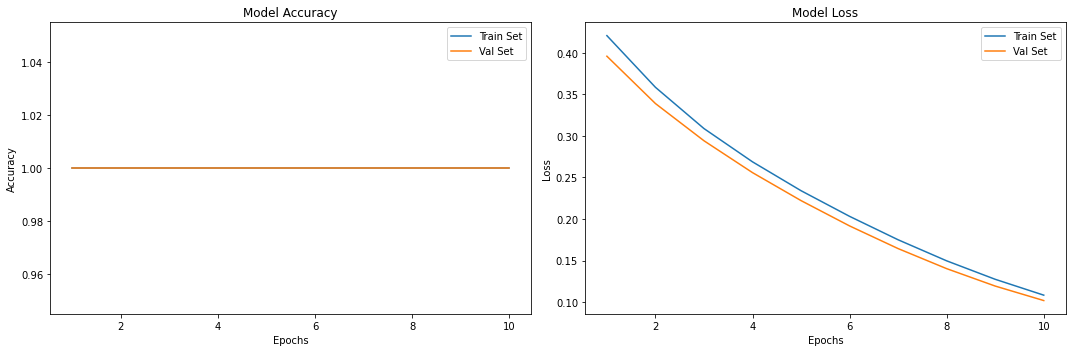

In [ ]:
# fit stacked model on test dataset
fit_stacked_model(stacked_model, X_train, Y_train)


In [ ]:
from numpy import argmax
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = argmax(yhat, axis=1)
acc = accuracy_score(Y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

Stacked Test Accuracy: 0.972


Epoch 1/10
4/4 [==============================] - 5s 2s/step - loss: 0.1610 - accuracy: 0.9655 - val_loss: 0.1153 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 3s 674ms/step - loss: 0.1641 - accuracy: 0.9569 - val_loss: 0.1118 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 3s 678ms/step - loss: 0.1557 - accuracy: 0.9741 - val_loss: 0.1084 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 3s 679ms/step - loss: 0.1555 - accuracy: 0.9483 - val_loss: 0.1052 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 3s 678ms/step - loss: 0.1509 - accuracy: 0.9569 - val_loss: 0.1021 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 3s 683ms/step - loss: 0.1433 - accuracy: 0.9741 - val_loss: 0.0992 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 3s 691ms/step - loss: 0.1381 - accuracy: 0.9741 - val_loss: 0.0966 - val_accuracy: 1.0000
Epoch 8/10
4/4 [=======

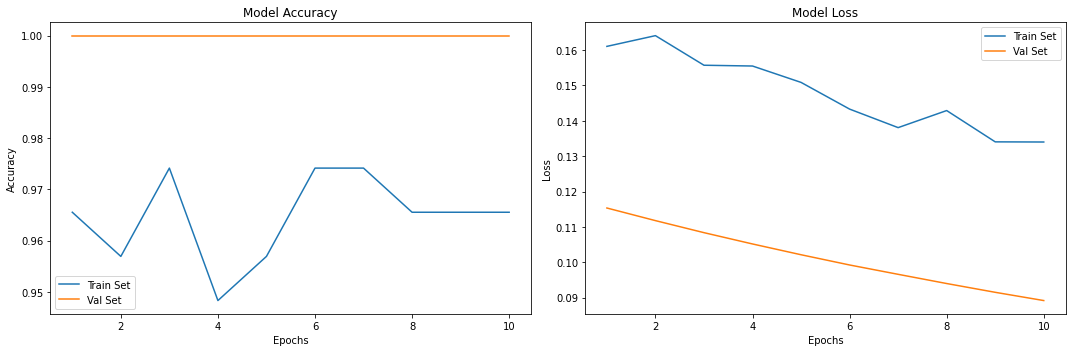

In [ ]:
# fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test, Y_test)


In [ ]:
from numpy import argmax
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = argmax(yhat, axis=1)
acc = accuracy_score(Y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

Stacked Test Accuracy: 0.979


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

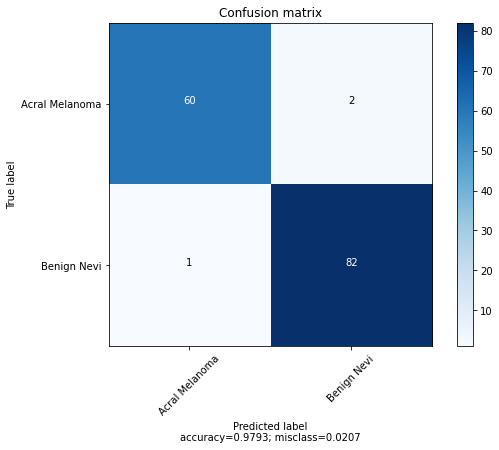

In [ ]:
confusion_mtx = confusion_matrix(Y_test, yhat)
cm_plot_labels = ['Acral Melanoma','Benign Nevi']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

In [ ]:

stacked_model.save ("/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/stacked model2.h5")
model_json = stacked_model.to_json()
with open ("/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/stacked model2.json",'w') as json_file:
  json_file.write(model_json)

In [ ]:
model = load_model("/content/drive/MyDrive/Acral Melanoma and Benign Disease Classification/final model/stacked model2.h5")

In [ ]:
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)

In [ ]:
from numpy import argmax
# make predictions and evaluate
yhat = predict_stacked_model(model, X_test)
yhat = argmax(yhat, axis=1)
acc = accuracy_score(Y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

Stacked Test Accuracy: 0.979


In [ ]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.98      0.99      0.98        83

    accuracy                           0.98       145
   macro avg       0.98      0.98      0.98       145
weighted avg       0.98      0.98      0.98       145

